In [36]:
import csv
import pandas as pd
import numpy as np

In [87]:
artists = pd.read_csv('artists3.txt')
artworks = pd.read_csv('artworks3.txt')

In [147]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15595 entries, 0 to 15594
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15595 non-null  int64  
 1   DisplayName    15595 non-null  object 
 2   ArtistBio      13401 non-null  object 
 3   Nationality    13107 non-null  object 
 4   Gender         12352 non-null  object 
 5   BeginDate      12041 non-null  float64
 6   EndDate        5553 non-null   float64
 7   Wiki QID       3247 non-null   object 
 8   ULAN           2931 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.1+ MB


In [347]:
artworks.info() #BeginDate and EndDate are non-numeric, but it's OK because they are floats in the artists dataset

<class 'pandas.core.frame.DataFrame'>
Index: 126457 entries, 0 to 155992
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Title               126414 non-null  object        
 1   Artist              125401 non-null  object        
 2   ConstituentID       125401 non-null  object        
 3   ArtistBio           121394 non-null  object        
 4   Nationality         121329 non-null  category      
 5   BeginDate           119494 non-null  object        
 6   EndDate             87502 non-null   object        
 7   Gender              119558 non-null  object        
 8   Date                124814 non-null  object        
 9   Medium              118245 non-null  object        
 10  Dimensions          124945 non-null  object        
 11  CreditLine          125119 non-null  object        
 12  AccessionNumber     126457 non-null  object        
 13  Classification      126457 non-nul

In [93]:
artists.isnull() #Checking for missing data

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
15590,False,False,True,True,False,False,False,True,True
15591,False,False,True,True,False,False,False,True,True
15592,False,False,True,True,True,False,False,True,True
15593,False,False,True,True,False,False,False,True,True


In [95]:
artworks.isnull()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156628,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
156629,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
156630,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
156631,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [101]:
#Making sure missing values are interpreted as NaN rather than skewing the data
artists = artists.replace('()', np.NaN)
artists = artists.replace(0, np.NaN)
artists.head(50)

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,male,1930.0,1992.0,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936.0,NaN,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941.0,NaN,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946.0,NaN,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941.0,NaN,NaN,NaN
5,6,Danilo Aroldi,"Italian, born 1925",Italian,male,1925.0,NaN,NaN,NaN
6,7,Bill Aron,"American, born 1941",American,male,1941.0,NaN,NaN,NaN
7,9,David Aronson,"American, born Lithuania 1923",American,male,1923.0,NaN,Q5230870,500003363.0
8,10,Irene Aronson,"American, born Germany 1918",American,female,1918.0,NaN,Q19748568,500042413.0
9,11,Jean (Hans) Arp,"French, born Germany (Alsace). 1886–1966",French,male,1886.0,1966.0,Q153739,500031000.0


In [193]:
artworks = artworks.replace('(0)', np.NaN)
artworks = artworks.replace('()', np.NaN)
artworks['Gender'] = artworks['Gender'].str.replace('(', '')
artworks['Gender'] = artworks['Gender'].str.replace(')', '')
artworks.head(50)

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),Male,1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),NaN,Male,1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),Male,1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",NaN,(1944),NaN,Male,1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),Male,1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN
5,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",NaN,(1944),NaN,Male,1976-77,Gelatin silver photograph,...,NaN,NaN,NaN,NaN,35.6000,NaN,NaN,45.7000,NaN,NaN
6,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",NaN,(1944),NaN,Male,1976-77,Gelatin silver photographs,...,NaN,NaN,NaN,NaN,35.6000,NaN,NaN,45.7000,NaN,NaN
7,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",NaN,(1944),NaN,Male,1976-77,Gelatin silver photograph,...,NaN,NaN,NaN,NaN,35.6000,NaN,NaN,45.7000,NaN,NaN
8,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",NaN,(1944),NaN,Male,1976-77,Gelatin silver photograph,...,NaN,NaN,NaN,NaN,35.6000,NaN,NaN,45.7000,NaN,NaN
9,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",NaN,(1944),NaN,Male,1976-77,Gelatin silver photograph,...,NaN,NaN,NaN,NaN,35.6000,NaN,NaN,45.7000,NaN,NaN


In [329]:
#Height and Width in the artworks data should be numeric

artworks['Height (cm)'] = artworks['Height (cm)'].astype(str).fillna('')
artworks = artworks[artworks['Height (cm)'].notna() & artworks['Height (cm)'].str.match(r'^\d+\.?\d*$')]

artworks['Width (cm)'] = artworks['Width (cm)'].astype(str).fillna('')
artworks = artworks[artworks['Width (cm)'].notna() & artworks['Width (cm)'].str.match(r'^\d+\.?\d*$')]

artworks['Height (cm)'] = pd.to_numeric(artworks['Height (cm)'], errors='coerce')
artworks['Height (cm)'] = artworks['Height (cm)'].fillna(0).astype(int)

artworks['Width (cm)'] = pd.to_numeric(artworks['Width (cm)'], errors='coerce')
artworks['Width (cm)'] = artworks['Width (cm)'].fillna(0).astype(int)

artworks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126457 entries, 0 to 155992
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Title               126414 non-null  object        
 1   Artist              125401 non-null  object        
 2   ConstituentID       125401 non-null  object        
 3   ArtistBio           121394 non-null  object        
 4   Nationality         121329 non-null  category      
 5   BeginDate           119494 non-null  object        
 6   EndDate             87502 non-null   object        
 7   Gender              119558 non-null  object        
 8   Date                124814 non-null  object        
 9   Medium              118245 non-null  object        
 10  Dimensions          124945 non-null  object        
 11  CreditLine          125119 non-null  object        
 12  AccessionNumber     126457 non-null  object        
 13  Classification      126457 non-nul

In [111]:
#The DateAquired column in artworks should be converted to datetime format
artworks['DateAcquired'].head(10)

0   1996-04-09
1   1995-01-17
2   1997-01-15
3   1995-01-17
4   1997-01-15
5   1995-01-17
6   1995-01-17
7   1995-01-17
8   1995-01-17
9   1995-01-17
Name: DateAcquired, dtype: datetime64[ns]

In [109]:
artworks['DateAcquired'] = pd.to_datetime(artworks['DateAcquired']) #Pretty easy

In [165]:
#Now time to visualize my data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# artworks numerical columns to plot: DateAcquired, 23-30

In [163]:
artworks['Gender'] = pd.Categorical(artworks['Gender'])
artworks['Nationality'] = pd.Categorical(artworks['Nationality'])
artworks['Classification'] = pd.Categorical(artworks['Classification'])
artworks['Department'] = pd.Categorical(artworks['Department'])

In [181]:
artworks['Gender'] = artworks['Gender'].str.strip().str.title()

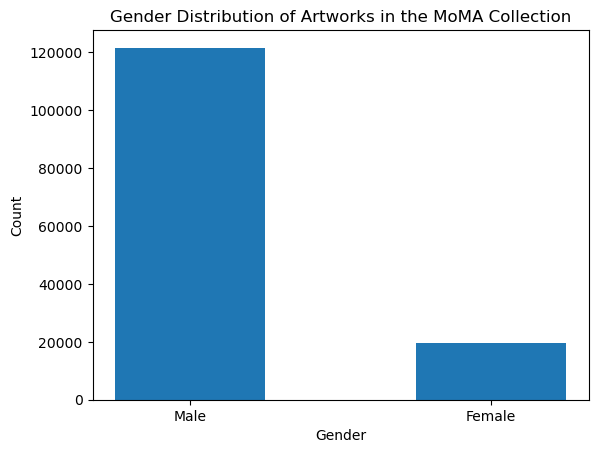

In [249]:
#Gender histogram for the artworks data
#I used only top 2 genders because outlier genders were  

works_top2 = artworks[artworks['Gender'].isin(['Male', 'Female'])]

works_gender = works_top2['Gender'].value_counts().index
works_gender_counts = works_top2['Gender'].value_counts().values

plt.bar(works_gender, works_gender_counts, width=0.5)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Artworks in the MoMA Collection')
plt.show()

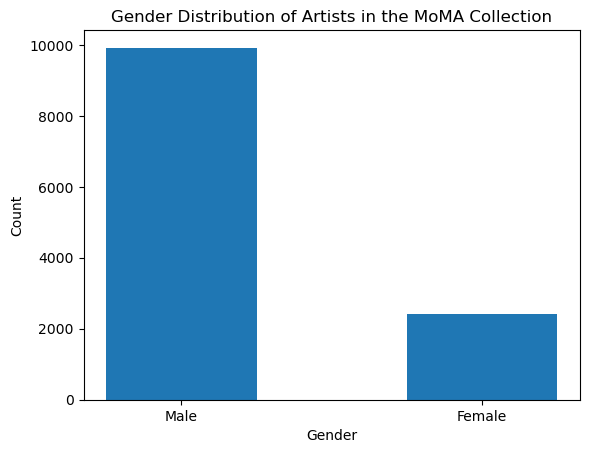

In [255]:
#Gender histogram for the artists data, looks about similar

artists['Gender'] = artists['Gender'].str.strip().str.title()

artists_top2 = artists[artists['Gender'].isin(['Male', 'Female'])]

artists_gender = artists_top2['Gender'].value_counts().index
artists_gender_counts = artists_top2['Gender'].value_counts().values

plt.bar(artists_gender, artists_gender_counts, width=0.5)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Artists in the MoMA Collection')
plt.show()

In [203]:
#I want to just get see how the top 10 nationalities in my artworks data look
top_10_values = artworks['Nationality'].value_counts().head(10)
print(top_10_values)

Nationality
(American)    72754
(French)      22846
(German)       9605
(British)      5692
(Spanish)      3150
(Italian)      2774
(Japanese)     2450
(Russian)      2158
(Swiss)        2123
(Dutch)        1614
Name: count, dtype: int64


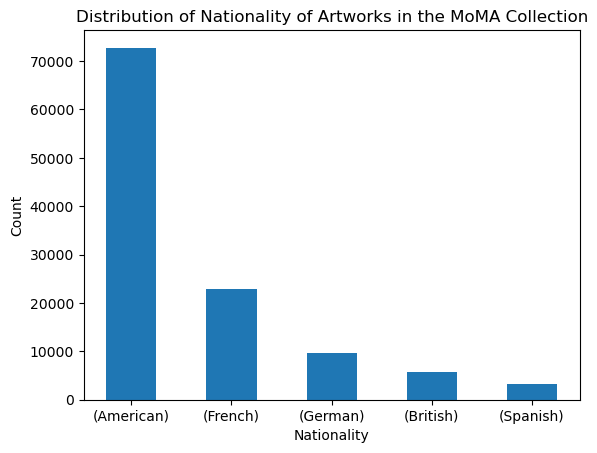

In [227]:
#Nationality histogram for the artworks data, top 5 are still skewed towards America and is all Europe

works_nationality = artworks['Nationality'].value_counts().head(5).index
works_nationality_counts = artworks['Nationality'].value_counts().head(5).values

plt.bar(works_nationality, works_nationality_counts, width=0.5)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Distribution of Nationality of Artworks in the MoMA Collection')
plt.show()

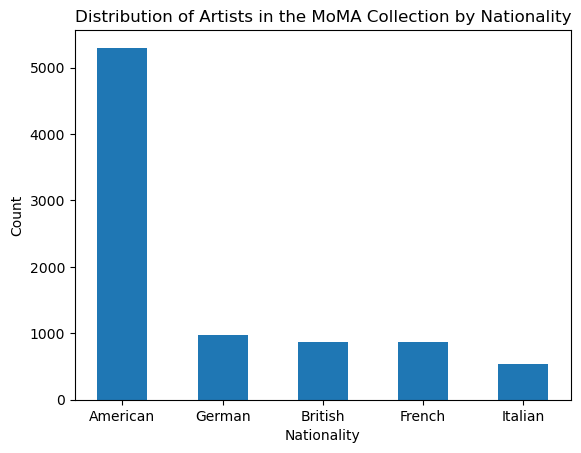

In [231]:
#Doing the same for the artist data, notably less French

artists_nationality = artists['Nationality'].value_counts().head(5).index
artists_nationality_counts = artists['Nationality'].value_counts().head(5).values

plt.bar(artists_nationality, artists_nationality_counts, width=0.5)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Distribution of Artists in the MoMA Collection by Nationality')
plt.show()

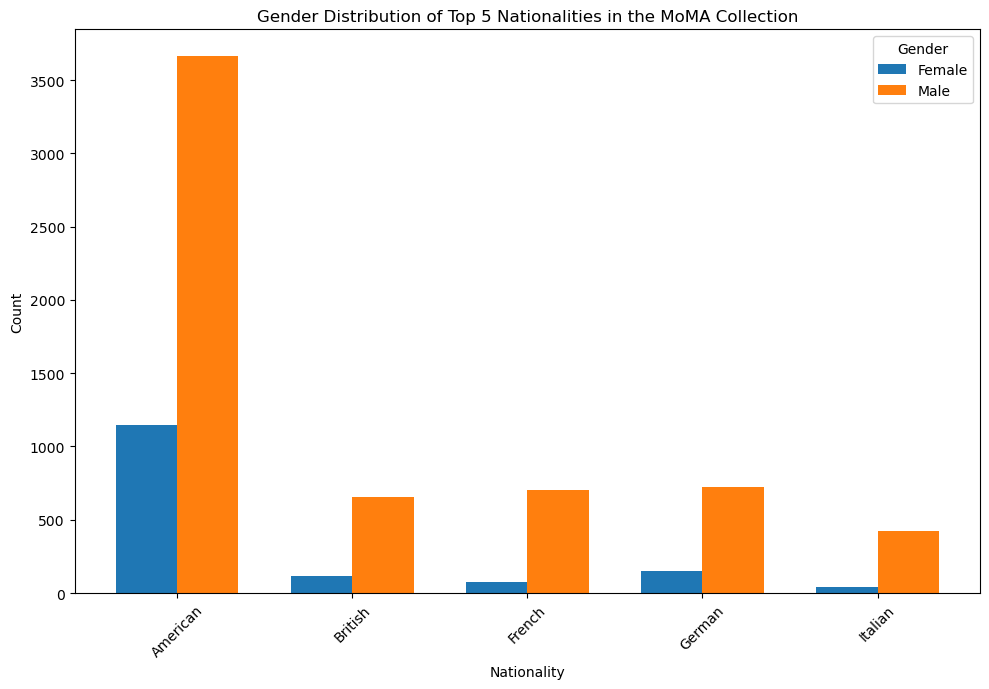

In [259]:
filtered_data = artists[artists['Nationality'].isin(artists_nationality) & artists['Gender'].isin(artists_gender)]
grouped_data = filtered_data.groupby(['Nationality', 'Gender']).size().unstack(fill_value=0)

#Size gives a count
#Unstack interpolates

grouped_data = grouped_data.astype(int)

nationalities = grouped_data.index
genders = grouped_data.columns
bar_width = 0.35

index = np.arange(len(nationalities))

fig, ax = plt.subplots(figsize=(10,7))

bar1 = ax.bar(index, grouped_data[genders[0]], bar_width, label=genders[0])
bar2 = ax.bar(index + bar_width, grouped_data[genders[1]], bar_width, label=genders[1])

ax.set_xlabel('Nationality')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution of Top 5 Nationalities in the MoMA Collection')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(nationalities, rotation=45)
ax.legend(title='Gender')

plt.tight_layout()
plt.show()

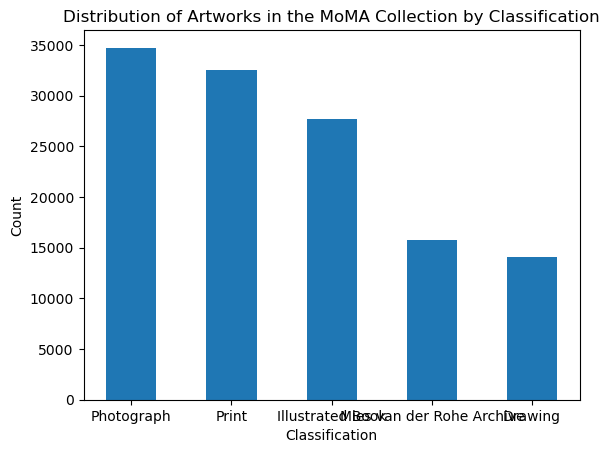

In [223]:
works_classification = artworks['Classification'].value_counts().head(5).index
works_classification_counts = artworks['Classification'].value_counts().head(5).values

plt.bar(works_classification, works_classification_counts, width=0.5)
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Distribution of Artworks in the MoMA Collection by Classification')
plt.show()

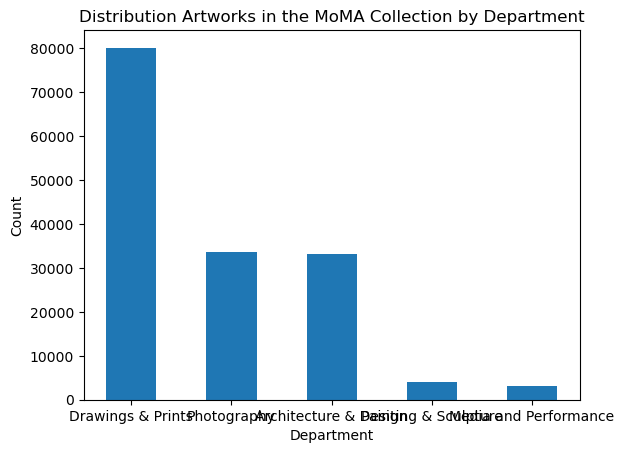

In [225]:
works_department = artworks['Department'].value_counts().head(5).index
works_department_counts = artworks['Department'].value_counts().head(5).values

plt.bar(works_department, works_department_counts, width=0.5)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution Artworks in the MoMA Collection by Department')
plt.show()

Text(0.5, 1.0, 'Artist Career Begin and End Dates')

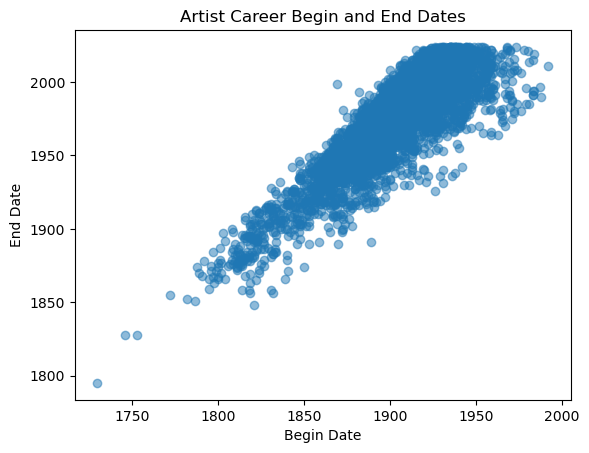

In [275]:
#Scatterplot of lifespans of artists data

artists_lifespans = artists[(artists['BeginDate'] >= 1300) & (artists['EndDate'] >= 1300)] #Filtering out outliers

plt.scatter((artists_lifespans['BeginDate']), (artists_lifespans['EndDate']), alpha=0.5)

plt.xlabel('Begin Date')
plt.ylabel('End Date')
plt.title('Artist Career Begin and End Dates')

Text(0.5, 1.0, 'Sizes of Artworks in the MoMa')

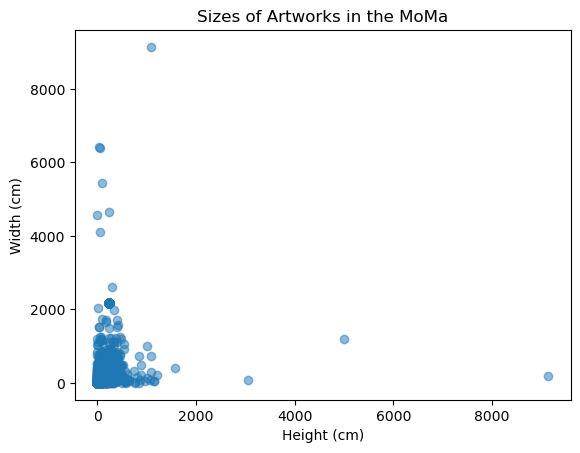

In [333]:
plt.scatter((artworks['Height (cm)']), (artworks['Width (cm)']), alpha=0.5)

plt.xlabel('Height (cm)')
plt.ylabel('Width (cm)')
plt.title('Sizes of Artworks in the MoMa')

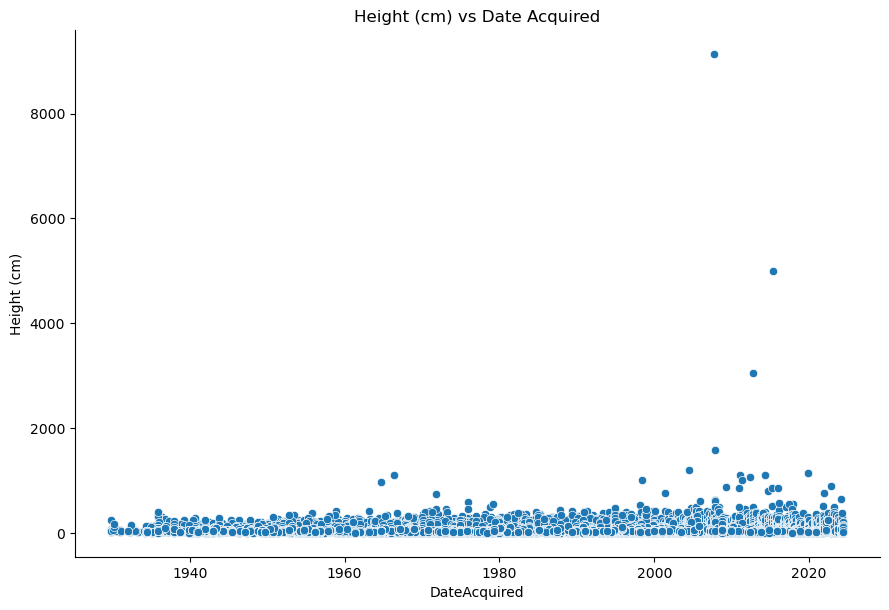

In [361]:
#Plotting DateAcquired against height - an extra analysis that interested me

artworks_clean = artworks.dropna(subset=['DateAcquired', 'Height (cm)'])

sns.relplot(x='DateAcquired', y='Height (cm)', data=artworks_clean, kind='scatter', height=6, aspect=1.5)

plt.title('Height (cm) vs Date Acquired')
plt.show()

In [379]:
#I have to convert the ConstituentID column in artworks to integer so I can merge with artists

artworks['ConstituentID'] = artworks['ConstituentID'].fillna('')
numeric_ids = artworks[artworks['ConstituentID'].str.isdigit()]

numeric_ids.loc[:,'ConstituentID'] = numeric_ids['ConstituentID'].astype(int)

artworks_df = numeric_ids[numeric_ids['ConstituentID'] > 0]

moma_collection = pd.merge(artists, artworks_df, on='ConstituentID', how='inner')
moma_collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118851 entries, 0 to 118850
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ConstituentID       118851 non-null  object        
 1   DisplayName         118851 non-null  object        
 2   ArtistBio_x         114964 non-null  object        
 3   Nationality_x       114779 non-null  object        
 4   Gender_x            113008 non-null  object        
 5   BeginDate_x         112944 non-null  float64       
 6   EndDate_x           80952 non-null   float64       
 7   Wiki QID            86171 non-null   object        
 8   ULAN                85025 non-null   float64       
 9   Title               118835 non-null  object        
 10  Artist              118851 non-null  object        
 11  ArtistBio_y         114964 non-null  object        
 12  Nationality_y       114779 non-null  category      
 13  BeginDate_y         112944 no

In [377]:
#Finding all Serbian artists
all_serbian_artists = artist_and_artwork[artist_and_artwork['Nationality_x'] == 'Serbian']

#Dropping all duplicates
serbian_artists = all_serbian_artists.drop_duplicates(subset=['DisplayName'])

print(serbian_artists)

       ConstituentID          DisplayName  \
38248           2845       Olja Ivanjicki   
45112           3242      Jovan Kratohvil   
75785           5768       Ivan Tabaković   
79737           6125  Vladimir Veličković   
80606           6195      Lazar Vujaklija   
104016         26439     Marina Abramović   
108122         30925           Dejan Grba   
115720         67233    Bogdan Bogdanović   

                                     ArtistBio_x Nationality_x Gender_x  \
38248                       Serbian, 1931 – 2009       Serbian   Female   
45112                       Serbian, 1924 – 1998       Serbian     Male   
75785   Serbian, born Austria Hungary, 1898–1977       Serbian     Male   
79737            Serbian and French, 1935 – 2019       Serbian     Male   
80606                         Serbian, born 1914       Serbian     Male   
104016                        Serbian, born 1946       Serbian   Female   
108122                        Serbian, born 1967       Serbian     Ma